# Wind energy - Exploratory Data Analysis

### First insight

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

pd.options.display.max_columns = 300

import warnings
warnings.filterwarnings("ignore")

In [2]:
path = "../../../datasets/_classified/kaggle/"

In [3]:
df_wind_on = pd.read_csv(path + "wind_generation_by_country.csv")
df_wind_on.head(2)

,AT,BE,BG,CH,CY,CZ,DE,DK,EE,ES,FI,FR,EL,HR,HU,IE,IT,LT,LU,LV,NL,NO,PL,PT,RO,SI,SK,SE,UK
0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
df_wind_st = pd.read_csv(path + "wind_generation_by_station.csv")
df_wind_st.tail(2)

,PL41,ES21,PL32,UKK1,PL34,ES24,CZ06,UKM6,CZ03,ES41,PL33,PL62,BG42,BG31,NO05,UKE2,UKK4,RO21,DK04,PL21,DK01,ES13,HU10,PL52,PL11,HU32,RO11,UKE4,NO07,CH05,IE02,ES42,SE23,PT17,PT15,AT12,BE33,CZ02,HU33,ES70,PL31,PT30,PL63,PL42,UKN0,PT20,SE12,GR22,HU23,BE23,UKD4,UKC1,SE32,BG33,UKG2,UKF3,CZ04,DK03,PL51,CH01,HU21,PL22,PL61,ES12,BE21,UKD1,ES53,NO04,GR30,ES51,AT31,ES23,UKK2,ES30,GR24,AT22,BE31,UKM5,UKD7,AT11,UKF1,DK02,HU22,RO42,UKH3,BE22,FI1B,UKH2,PT18,UKM3,AT32,AT21,HU31,PT11,NO02,CZ05,AT13,UKL2,GR11,PT16,BE32,CZ08,RO12,GR25,UKI2,UKE3,RO31,PL12,GR13,UKJ3,ES22,PL43,UKJ4,SE31,UKD3,FI1D,ES52,UKF2,UKK3,NO06,SE21,BG34,NO03,RO32,GR41,UKH1,SE33,BG32,GR21,BE24,GR14,UKJ1,RO41,CH06,BE34,GR23,BE25,ES62,FI1C,GR43,UKC2,CZ07,SE22,ES43,UKI1,GR42,UKJ2,CH02,IE01,UKM2,FI20,SE11,DK05,UKE1,UKL1,BE35,FI19,GR12,ES11,SK02,RO22,ES61,NL22,ITI3,ITC1,DE80,DEA3,NL42,NL41,ITC4,FR30,DE12,DEB2,DE73,FR71,FR25,FR42,ITI2,ITH1,ITC3,DE50,NL34,FR82,DE27,NL21,ITG2,FR41,DEA5,FR83,DEA4,ITF2,DE25,NL33,DE71,DE93,NL31,FR10,DEF0,ITF4,DED2,FR61,DEA1,ITF5,DEG0,DEA2,ITF6,DE13,DE91,DE21,FR62,SI01,ITI1,FR52,DED4,DEB3,DE14,NL23,DE24,DED5,FR24,DE11,HR03,FR22,FR23,DE22,FR53,DE23,NL12,DEE0,NL32,NL11,ITH5,SI02,DE92,ITF3,DE94,DE60,FR21,DE40,DE30,ITH3,FR63,FR81,ITG1,FR72,DEC0,ITF1,DE72,FR43,ITI4,NL13,DE26,FR26,DEB1,FR51
262966,0.11517,0.02891,0.00746,0.39276,0.06970,0.00093,0.01762,0.45424,0.07164,0.01547,0.0,0.20068,0.17146,0.41602,0.24513,0.42257,0.18939,0.14923,0.16347,0.42667,0.04296,0.16894,0.0,0.10763,0.16247,0.03846,0.06035,0.04482,0.76514,0.0,0.23165,0.00175,0.22597,0.05108,0.00076,0.03709,0.16248,0.03586,0.00051,0.01757,0.03522,0.12906,0.28914,0.10192,0.68302,0.95,0.60937,0.07504,0.00352,0.59955,0.2306,0.65681,0.25374,0.20996,0.95,0.16801,0.01923,0.14489,0.03880,0.0,0.01422,0.36923,0.23919,0.08230,0.51000,0.14923,0.0,0.50450,0.95000,0.01268,0.01532,0.0,0.95,0.0,0.56517,0.05792,0.24323,0.95,0.16587,0.03379,0.96389,0.05515,0.03482,0.00241,0.36377,0.36604,0.14719,0.33305,0.00562,0.18853,0.00846,0.0,0.00337,0.09512,0.49440,0.03292,0.02175,0.09754,0.24578,0.05174,0.35012,0.31172,0.00021,0.09952,0.95,0.35760,0.21114,0.08053,0.0,0.95,0.00182,0.00928,0.05112,0.05449,0.95,0.40205,0.02625,0.40258,0.24227,0.77216,0.76982,0.25418,0.58537,0.05675,0.26362,0.20774,0.33346,NaN,0.27840,0.34681,0.12736,0.56180,0.95,0.05162,0.09103,0.28678,0.17339,0.00164,0.39580,0.95,0.68284,0.05143,0.07742,0.0,0.95,0.86808,0.95,0.00608,0.38180,0.30150,0.95,0.77500,0.21044,0.29278,0.07333,0.30423,0.48866,0.0,0.30903,0.00923,0.14955,0.03798,0.31445,0.01650,0.0,0.02903,0.31705,0.39241,0.53567,0.0,0.80546,0.00391,0.14987,0.06198,0.00038,0.20541,0.04270,0.0,0.0,0.01022,0.42415,0.51554,0.04228,0.00025,0.53834,0.0,0.11824,0.17342,0.0,0.17345,0.00007,0.00008,0.48269,0.00731,0.14214,0.44945,0.25981,0.30255,0.01155,0.01559,0.00000,0.51587,0.01936,0.02311,0.28869,0.01537,0.00582,0.05360,0.00294,0.04694,0.0,0.03633,0.00163,0.06876,0.03606,0.00379,0.30585,0.01215,0.08386,0.14474,0.00082,0.00212,0.49575,0.58929,0.00012,0.09970,0.00003,0.95,0.03464,0.74878,0.26019,0.06528,0.06362,0.19128,0.00275,0.32574,0.18942,0.16208,0.00583,0.00242,0.0,0.02599,0.05426,0.00073,0.00512,0.04609,0.00101,0.02643,0.01273,0.00200,0.34314,0.00096,0.03337,0.07753,0.12646
262967,0.10217,0.04553,0.00406,0.24836,0.07608,0.00126,0.00993,0.44024,0.10114,0.03877,0.0,0.18193,0.12830,0.28308,0.24513,0.36775,0.11083,0.14073,0.17321,0.53333,0.03333,0.32100,0.0,0.10065,0.14812,0.03205,0.11397,0.04590,0.76514,0.0,0.16583,0.00665,0.18175,0.07166,0.00092,0.01582,0.16298,0.04569,0.00017,0.00586,0.03421,0.12537,0.25230,0.08591,0.70828,0.95,0.46292,0.05924,0.00000,0.57372,0.2182,0.58866,0.23043,0.24097,0.95,0.15345,0.02239,0.14007,0.02243,0.0,0.00430,0.59487,0.20702,0.10435,0.49875,0.13592,0.0,0.53028,0.87191,0.00773,0.01532,0.0,0.95,0.0,0.42992,0.06276,0.23472,0.95,0.16196,0.01782,0.79790,0.03996,0.01833,0.00103,0.36495,0.37343,0.14630,0.29745,0.00491,0.18112,0.00846,0.0,0.00337,0.12297,0.42189,0.01830,0.00000,0.10334,0.20675,0.05681,0.33138,0.28662,0.00073,0.07541,0.9

In [5]:
df_wind_st.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 262968 entries, 0 to 262967
Columns: 255 entries, PL41 to FR51
dtypes: float64(255)
memory usage: 511.6 MB


In [6]:
df_wind_st.shape

(262968, 255)

In [7]:
df_wind_on.shape

(262968, 29)

In [8]:
df_wind_st.dtypes

PL41    float64
ES21    float64
PL32    float64
UKK1    float64
PL34    float64
         ...   
NL13    float64
DE26    float64
FR26    float64
DEB1    float64
FR51    float64
Length: 255, dtype: object

In [9]:
#df_wind_st.describe()

In [10]:
#df_wind_on.describe()

### Dealing with timestamps

In [11]:
def add_time(_df):
    "Returns a DF with two new cols : the time and hour of the day"
    t = pd.date_range(start='1/1/1986', periods=_df.shape[0], freq = 'H')
    t = pd.DataFrame(t)
    _df = pd.concat([_df, t], axis=1)
    _df.rename(columns={ _df.columns[-1]: "time" }, inplace = True)
    _df['hour'] = _df['time'].dt.hour
    _df['month'] = _df['time'].dt.month
    _df['week'] = _df['time'].dt.week
    return _df

In [12]:
df_wind_on, df_wind_st = add_time(df_wind_on), add_time(df_wind_st)
df_wind_on.tail(2)

,AT,BE,BG,CH,CY,CZ,DE,DK,EE,ES,FI,FR,EL,HR,HU,IE,IT,LT,LU,LV,NL,NO,PL,PT,RO,SI,SK,SE,UK,time,hour,month,week
262966,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2015-12-31 22:00:00,22,12,53
262967,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2015-12-31 23:00:00,23,12,53


In [13]:
#df_wind_on.dtypes

Efficiency of solar stations per country during the last day (31th december 2015)

# Exploratory Data Analysis

In [14]:
def plot_hourly(df, title):
    plt.figure(figsize=(14, 9))
    for c in df.columns:
        if c != 'hour':
            sns.lineplot(x="hour", y=c, data=df, label=c)
            #plt.legend(c)
    plt.title(title)
    plt.show()

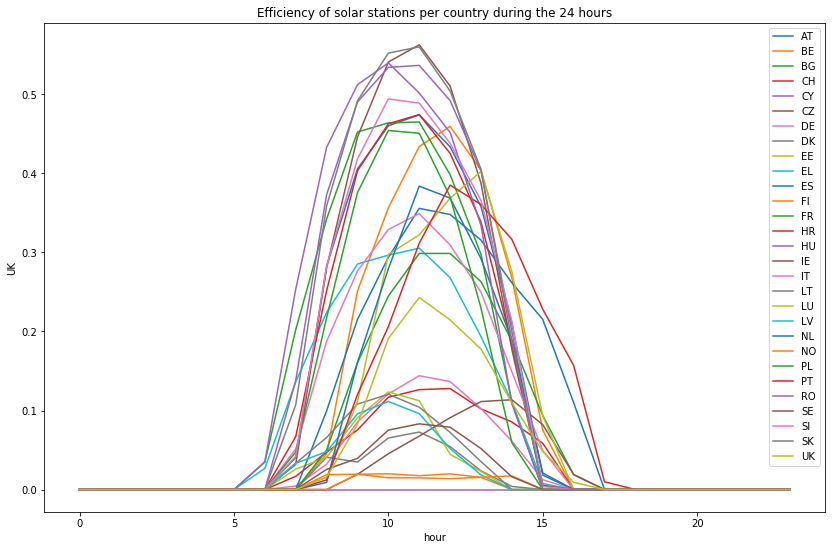

In [15]:
plot_hourly(df_wind_on[df_wind_on.columns.difference(['time', 'month', 'week'])][-24:], "Efficiency of solar stations per country during the 24 hours")

Strange shape, looks like the solar data sets !!!! let's take the datasets from the author's site : https://setis.ec.europa.eu/EMHIRES-datasets

---

In [16]:
del df_wind_on, df_wind_st

df_wind_on = pd.read_csv(path + "EMHIRES_WIND_COUNTRY_June2019.csv")
df_wind_off = pd.read_csv(path + "TS.CF.OFFSHORE.30yr.date.txt", sep='\t')

# convert columns as float
for c in df_wind_on.columns:
    df_wind_on[c] = df_wind_on[c].str.replace(',', '.').astype('float64')
       
# add time infos
df_wind_on = add_time(df_wind_on)
df_wind_on.head()

,AL,AT,BE,BG,BA,CH,CY,CZ,DE,DK,EE,EL,ES,FI,FR,HR,HU,XK,IE,IS,IT,LT,LU,LV,ME,MK,NL,NO,PL,PT,RO,RS,SE,SI,SK,UK,time,hour,month,week
0,0.3685,0.06084,0.25200,0.23762,0.2480,0.04731,0.140,0.12201,0.14169,0.24466,0.03310,0.49272,0.68749,0.31303,0.17573,0.20264,0.04151,0.3685,0.09189,0.834,0.33069,0.45416,0.02208,0.31143,0.284,0.284,0.40628,0.26292,0.12015,0.22683,0.05124,0.25050,0.17086,0.67720,0.05715,0.268794,1986-01-01 00:00:00,0,1,1
1,0.3235,0.05282,0.23841,0.23842,0.2270,0.08463,0.148,0.12907,0.13404,0.21717,0.04100,0.45874,0.66091,0.33866,0.16771,0.16130,0.03706,0.3235,0.06985,0.847,0.30066,0.44609,0.02166,0.27896,0.285,0.285,0.39115,0.26376,0.11985,0.25821,0.04665,0.24625,0.15909,0.66776,0.05218,0.270761,1986-01-01 01:00:00,1,1,1
2,0.2735,0.04276,0.22110,0.23033,0.2000,0.11741,0.157,0.12151,0.13172,0.19431,0.05674,0.42724,0.63251,0.36834,0.15877,0.13140,0.03250,0.2735,0.07464,0.843,0.27052,0.45043,0.01921,0.25944,0.262,0.262,0.36163,0.26695,0.12113,0.27921,0.04543,0.23250,0.15296,0.65904,0.03905,0.265209,1986-01-01 02:00:00,2,1,1
3,0.2600,0.02914,0.21491,0.24158,0.1875,0.13830,0.171,0.09998,0.13686,0.18278,0.07081,0.42569,0.61890,0.39019,0.14818,0.10758,0.02810,0.2600,0.09003,0.829,0.24614,0.43283,0.01655,0.23939,0.262,0.262,0.35170,0.27101,0.11858,0.33106,0.04455,0.20525,0.15328,0.58460,0.02130,0.257709,1986-01-01 03:00:00,3,1,1
4,0.2530,0.01780,0.20304,0.26168,0.1690,0.13895,0.179,0.07800,0.14124,0.17356,0.08243,0.44443,0.62397,0.40209,0.13631,0.09077,0.02681,0.2530,0.13664,0.798,0.21655,0.40777,0.01331,0.22052,0.243,0.243,0.36168,0.28097,0.11101,0.38668,0.05438,0.20075,0.15013,0.46732,0.01029,0.247726,1986-01-01 04:00:00,4,1,1


In [17]:
df_wind_off.tail()

,Time step,Date,Year,Month,Day,Hour,BE,DK,DE,NL,UK
262963,262964,31/12/2015 19:00,2015,12,31,19,0.86044,0.55980,0.62959,0.80591,0.59402
262964,262965,31/12/2015 20:00,2015,12,31,20,0.85848,0.54871,0.63238,0.81795,0.57018
262965,262966,31/12/2015 21:00,2015,12,31,21,0.85848,0.56894,0.63756,0.82433,0.52357
262966,262967,31/12/2015 22:00,2015,12,31,22,0.86632,0.59640,0.64048,0.82293,0.48621
262967,262968,31/12/2015 23:00,2015,12,31,23,0.86821,0.60744,0.64174,0.81602,0.46916


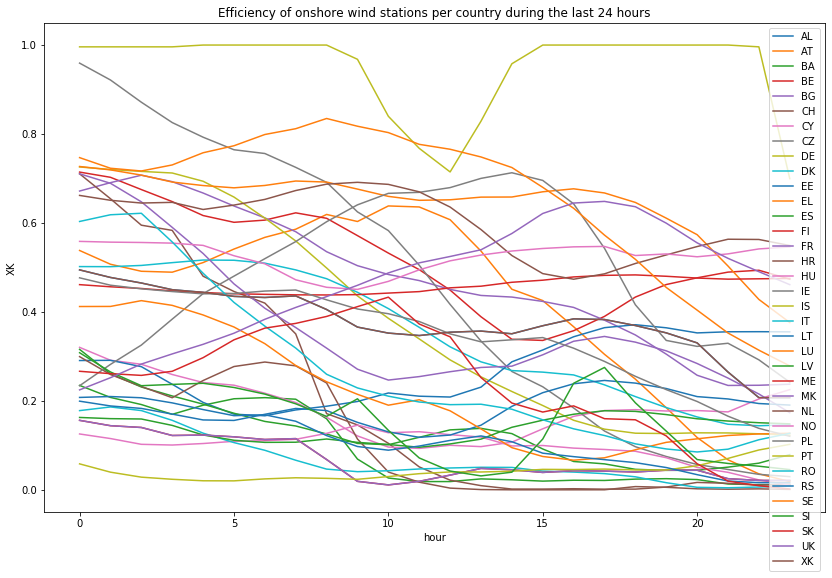

In [18]:
plot_hourly(df_wind_on[df_wind_on.columns.difference(['time', 'month', 'week'])][-24:], "Efficiency of onshore wind stations per country during the last 24 hours")

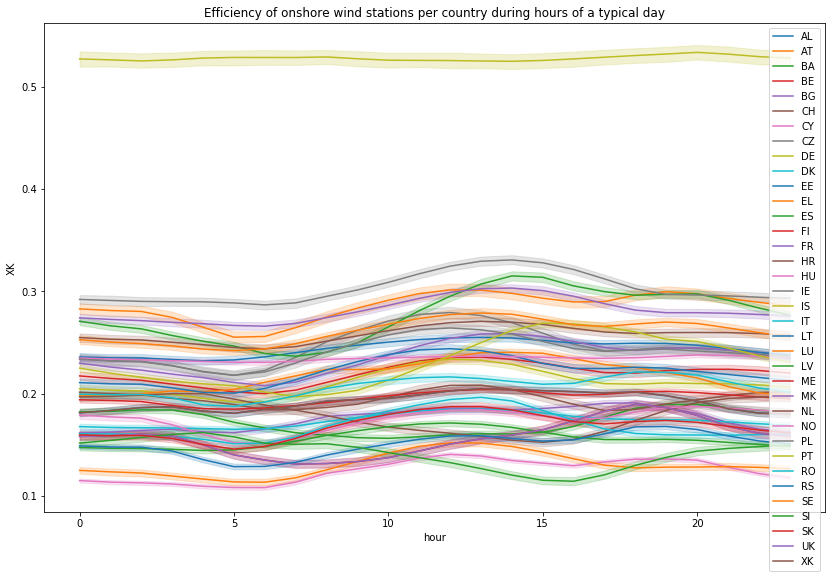

In [19]:
plot_hourly(df_wind_on[df_wind_on.columns.difference(['time', 'month', 'week'])], "Efficiency of onshore wind stations per country during hours of a typical day")

Text(0.5, 1.0, "Distribution of the station's efficiency for non null values (ie during the day)")

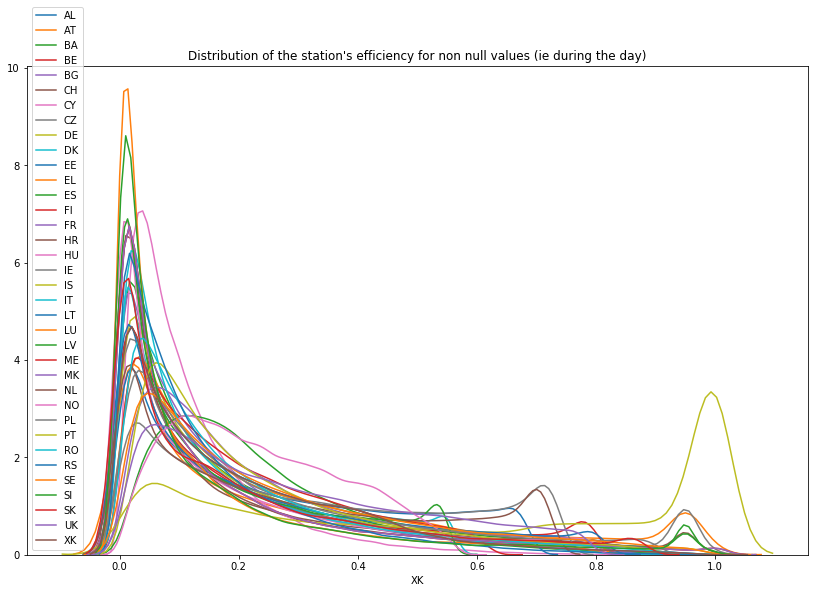

In [20]:
temp_df = df_wind_on[df_wind_on.columns.difference(['time', 'hour', 'month', 'week'])]
plt.figure(figsize=(14, 9))
for col in temp_df.columns:
    sns.distplot(temp_df[temp_df[col] != 0][col], label=col, hist=False)
plt.title("Distribution of the station's efficiency for non null values (ie during the day)")

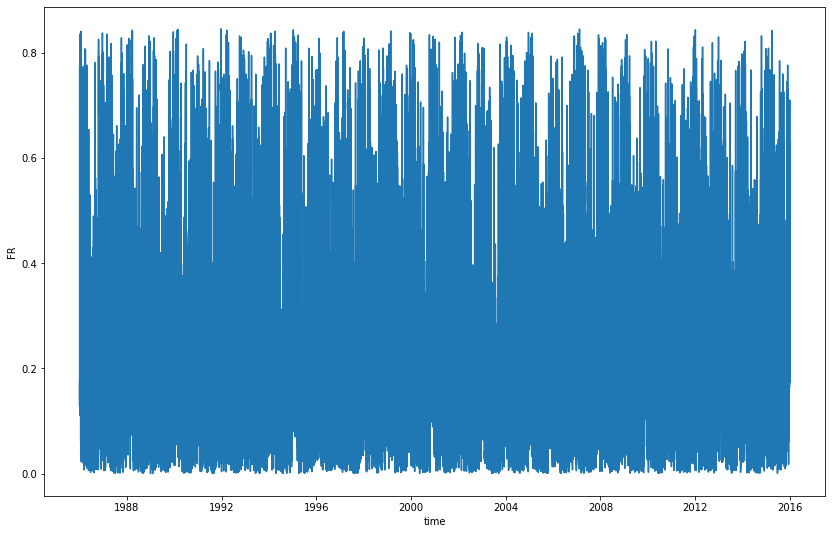

In [21]:
plt.figure(figsize=(14, 9))
sns.lineplot(x = df_wind_on.time, y = df_wind_on['FR'])

Text(0.5, 1.0, 'Efficiency across the months per country')

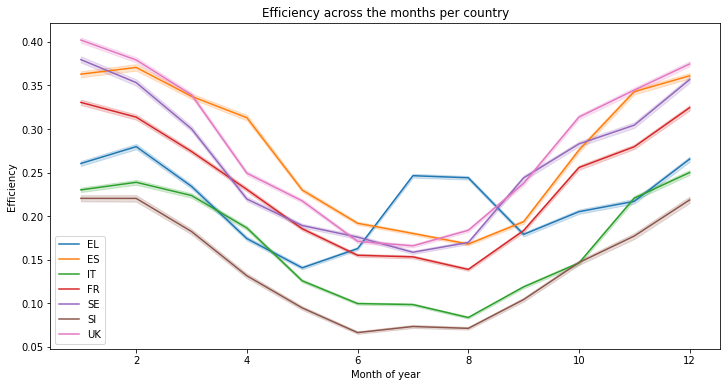

In [22]:
countries = ['EL', 'ES', 'IT', 'FR', 'SE', 'SI', 'UK']

plt.figure(figsize=(12, 6))
for c in countries:
    temp_df = df_wind_on[[c, 'month']]
    sns.lineplot(x=temp_df["month"], y=temp_df[c], label=c)
plt.xlabel("Month of year")
plt.ylabel("Efficiency") 
plt.title("Efficiency across the months per country")

Text(0.5, 1.0, 'Efficiency across the weeks per country')

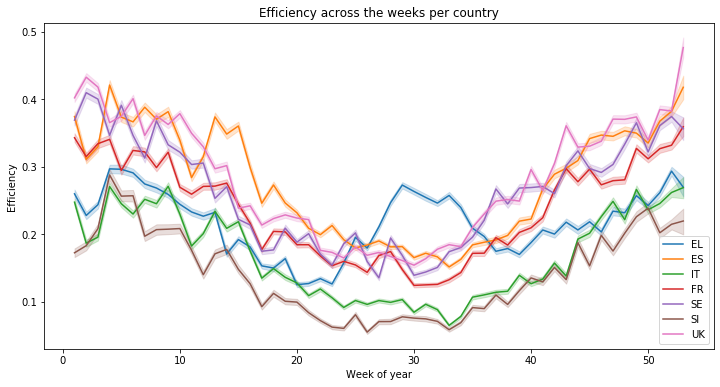

In [23]:
plt.figure(figsize=(12, 6))
for c in countries:
    temp_df = df_wind_on[[c, 'week']]
    sns.lineplot(x=temp_df["week"], y=temp_df[c], label=c)
plt.xlabel("Week of year")
plt.ylabel("Efficiency") 
plt.title("Efficiency across the weeks per country")

In [38]:
temp_df = df_wind_on.copy()
temp_df['year'] = temp_df['time'].dt.year
temp_df.head()

,AL,AT,BE,BG,BA,CH,CY,CZ,DE,DK,EE,EL,ES,FI,FR,HR,HU,XK,IE,IS,IT,LT,LU,LV,ME,MK,NL,NO,PL,PT,RO,RS,SE,SI,SK,UK,time,hour,month,week,year
0,0.3685,0.06084,0.25200,0.23762,0.2480,0.04731,0.140,0.12201,0.14169,0.24466,0.03310,0.49272,0.68749,0.31303,0.17573,0.20264,0.04151,0.3685,0.09189,0.834,0.33069,0.45416,0.02208,0.31143,0.284,0.284,0.40628,0.26292,0.12015,0.22683,0.05124,0.25050,0.17086,0.67720,0.05715,0.268794,1986-01-01 00:00:00,0,1,1,1986
1,0.3235,0.05282,0.23841,0.23842,0.2270,0.08463,0.148,0.12907,0.13404,0.21717,0.04100,0.45874,0.66091,0.33866,0.16771,0.16130,0.03706,0.3235,0.06985,0.847,0.30066,0.44609,0.02166,0.27896,0.285,0.285,0.39115,0.26376,0.11985,0.25821,0.04665,0.24625,0.15909,0.66776,0.05218,0.270761,1986-01-01 01:00:00,1,1,1,1986
2,0.2735,0.04276,0.22110,0.23033,0.2000,0.11741,0.157,0.12151,0.13172,0.19431,0.05674,0.42724,0.63251,0.36834,0.15877,0.13140,0.03250,0.2735,0.07464,0.843,0.27052,0.45043,0.01921,0.25944,0.262,0.262,0.36163,0.26695,0.12113,0.27921,0.04543,0.23250,0.15296,0.65904,0.03905,0.265209,1986-01-01 02:00:00,2,1,1,1986
3,0.2600,0.02914,0.21491,0.24158,0.1875,0.13830,0.171,0.09998,0.13686,0.18278,0.07081,0.42569,0.61890,0.39019,0.14818,0.10758,0.02810,0.2600,0.09003,0.829,0.24614,0.43283,0.01655,0.23939,0.262,0.262,0.35170,0.27101,0.11858,0.33106,0.04455,0.20525,0.15328,0.58460,0.02130,0.257709,1986-01-01 03:00:00,3,1,1,1986
4,0.2530,0.01780,0.20304,0.26168,0.1690,0.13895,0.179,0.07800,0.14124,0.17356,0.08243,0.44443,0.62397,0.40209,0.13631,0.09077,0.02681,0.2530,0.13664,0.798,0.21655,0.40777,0.01331,0.22052,0.243,0.243,0.36168,0.28097,0.11101,0.38668,0.05438,0.20075,0.15013,0.46732,0.01029,0.247726,1986-01-01 04:00:00,4,1,1,1986


Text(0.5, 1.0, 'Efficiency across the years per country')

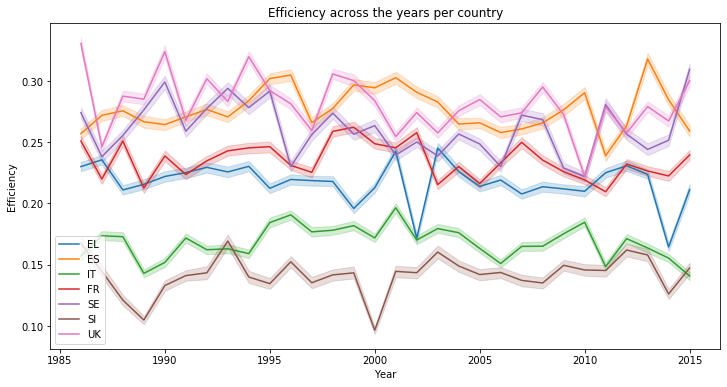

In [39]:
plt.figure(figsize=(12, 6))
for c in countries:
    temp_df_ = temp_df[[c, 'year']]
    sns.lineplot(x=temp_df_["year"], y=temp_df_[c], label=c)
plt.xlabel("Year")
plt.ylabel("Efficiency") 
plt.title("Efficiency across the years per country")

In [40]:
temp_df = temp_df.drop(columns=['time', 'hour', 'month', 'week', 'year'])
temp_df.describe()

,AL,AT,BE,BG,BA,CH,CY,CZ,DE,DK,EE,EL,ES,FI,FR,HR,HU,XK,IE,IS,IT,LT,LU,LV,ME,MK,NL,NO,PL,PT,RO,RS,SE,SI,SK,UK
count,262968.000000,262968.000000,262968.000000,262968.000000,262968.000000,262968.000000,262968.000000,262968.000000,262968.000000,262968.000000,262968.000000,262968.000000,262968.000000,262968.000000,262968.000000,262968.000000,262968.000000,262968.000000,262968.000000,262968.000000,262968.000000,262968.000000,262968.000000,262968.000000,262968.000000,262968.000000,262968.000000,262968.000000,262968.000000,262968.000000,262968.000000,262968.000000,262968.000000,262968.000000,262968.000000,262968.000000
mean,0.192005,0.284966,0.219247,0.175378,0.172726,0.195007,0.124571,0.246095,0.210704,0.173545,0.243895,0.217353,0.276766,0.195797,0.235092,0.180057,0.174992,0.192020,0.302541,0.527725,0.168171,0.221237,0.130291,0.155620,0.156886,0.156886,0.257536,0.234455,0.241043,0.231411,0.206581,0.150402,0.260767,0.141935,0.167874,0.281156
std,0.189453,0.295231,0.225203,0.180194,0.179407,0.243039,0.117986,0.269629,0.219232,0.158057,0.208249,0.193274,0.221379,0.158490,0.197681,0.219344,0.204408,0.189501,0.232659,0.380623,0.174528,0.222574,0.180421,0.160437,0.216913,0.216913,0.229632,0.138302,0.227140,0.200070,0.199103,0.160475,0.229128,0.222608,0.216641,0.210246
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000330,0.000000,0.000070,0.000000,0.000000,0.000000,0.000000,0.000000,0.000040,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000260,0.000000,0.000070,0.000000,0.000000,0.000440,0.000000,0.000000,0.000317
25%,0.040500,0.042980,0.038390,0.040190,0.035000,0.020100,0.043000,0.039990,0.044380,0.038680,0.057915,0.059690,0.116020,0.062760,0.082140,0.018450,0.015120,0.040500,0.091650,0.143000,0.036400,0.036937,0.009890,0.021900,0.008000,0.008000,0.051800,0.119130,0.062740,0.080390,0.058230,0.034500,0.079238,0.003990,0.002840,0.103094
50%,0.131500,0.168685,0.134780,0.113120,0.108000,0.091740,0.087000,0.142010,0.130820,0.124340,0.186530,0.154110,0.209010,0.153390,0.170620,0.082030,0.091790,0.131500,0.252025,0.514000,0.101570,0.141530,0.050640,0.094330,0.063000,0.063000,0.189280,0.214960,0.161840,0.164075,0.136680,0.094000,0.186475,0.041030,0.073130,0.229406
75%,0.294500,0.452305,0.338400,0.250142,0.258500,0.274152,0.165000,0.358482,0.307130,0.277390,0.405860,0.334360,0.370020,0.298873,0.337360,0.268990,0.266370,0.294500,0.501383,0.964000,0.246170,0.349713,0.172810,0.252080,0.212000,0.212000,0.433895,0.339190,0.358630,0.323300,0.291813,0.211500,0.385080,0.174660,0.251330,0.428451
max,0.996008,0.999980,0.795510,0.896790,1.001500,0.999950,0.927000,0.999990,0.987600,0.559150,0.680560,0.871850,0.999830,0.634540,0.845160,0.956380,0.805390,1.004500,0.733650,0.999063,0.870380,0.815800,0.807770,0.556100,1.022000,1.022000,0.712460,0.579430,0.911160,0.959080,0.992050,1.008000,0.999930,0.999640,0.883210,0.791400


In [41]:
def plot_by_country(_df, title, nb_col):
    _df = _df.describe().iloc[nb_col, :]
    plt.figure(figsize=(14, 6))
    sns.barplot(x=_df.index, y=_df.values)
    plt.title(title)

#plot_by_country("Mean efficiency by country", 1)

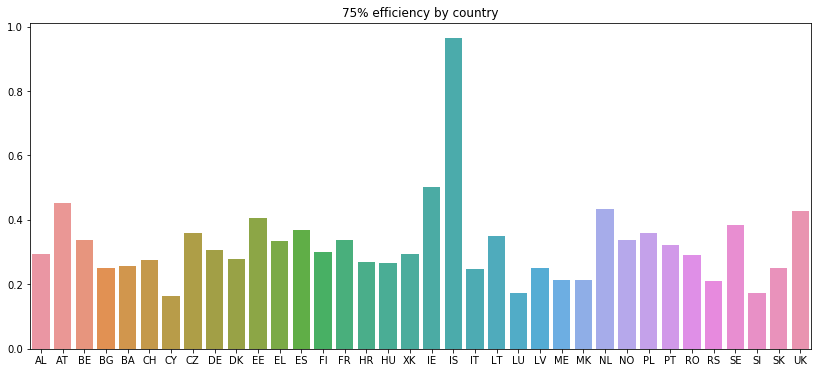

In [42]:
plot_by_country(temp_df, "75% efficiency by country", 6)

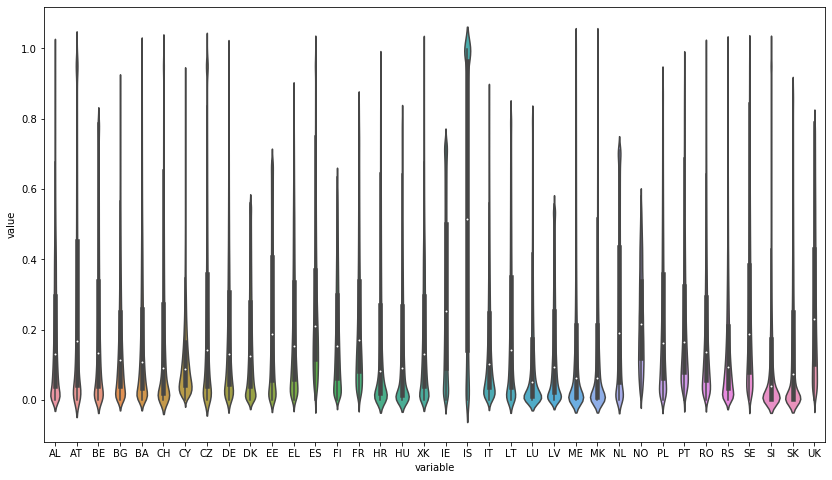

In [43]:
# credits : https://stackoverflow.com/questions/49554139/boxplot-of-multiple-columns-of-a-pandas-dataframe-on-the-same-figure-seaborn
# This works because pd.melt converts a wide-form dataframe
plt.figure(figsize=(14, 8))
sns.violinplot(x="variable", y="value", data=pd.melt(temp_df))

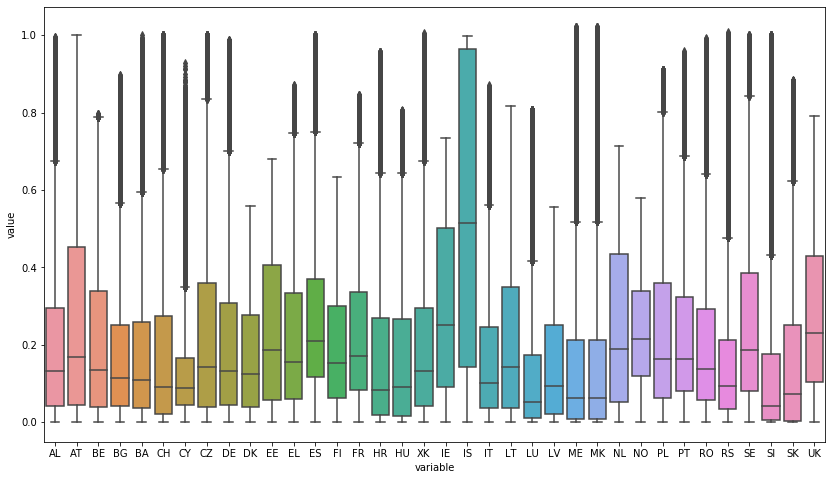

In [44]:
plt.figure(figsize=(14, 8))
sns.boxplot(x="variable", y="value", data=pd.melt(temp_df))

Text(0.5, 1.0, "Distribution of the station's efficiency")

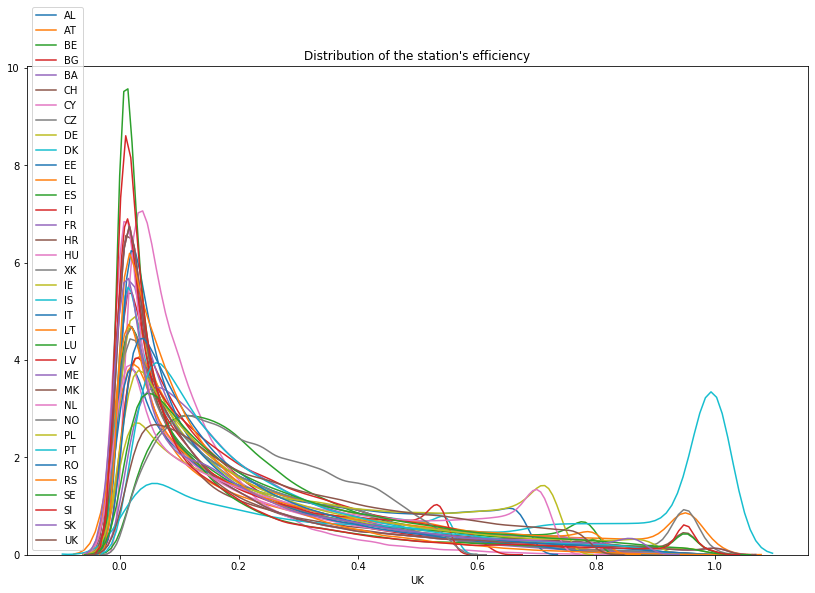

In [45]:
plt.figure(figsize=(14, 9))
for col in temp_df.columns:
    sns.distplot(temp_df[temp_df[col] != 0][col], label=col, hist=False)
plt.title("Distribution of the station's efficiency")

## Correlations

In [46]:
def plot_corr(df_):
    corr = df_.corr()
    corr

    # Generate a mask for the upper triangle
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(14, 12))

    # Generate a custom diverging colormap
    #cmap = sns.diverging_palette(220, 10, as_cmap=True)

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, mask=mask, center=0, square=True, cmap='Spectral', linewidths=.5, cbar_kws={"shrink": .5}) #annot=True

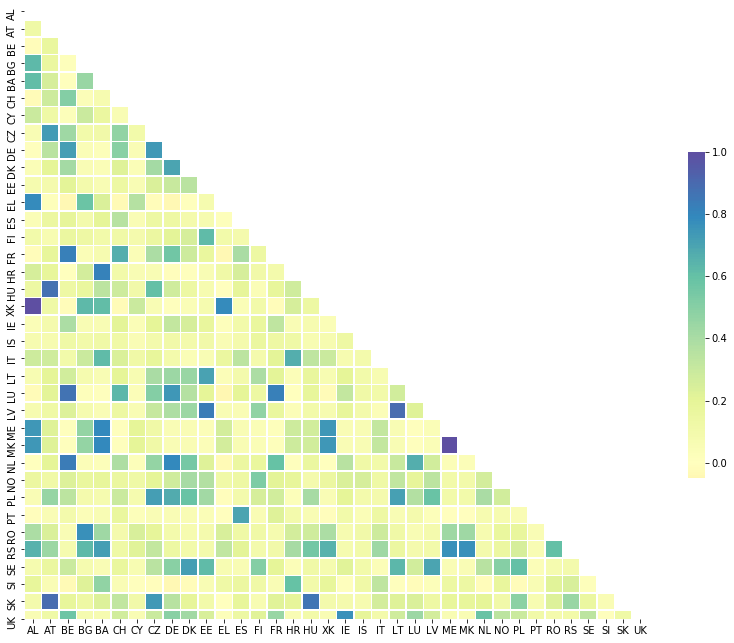

In [47]:
plot_corr(temp_df)

In [48]:
temp_df.corr()

,AL,AT,BE,BG,BA,CH,CY,CZ,DE,DK,EE,EL,ES,FI,FR,HR,HU,XK,IE,IS,IT,LT,LU,LV,ME,MK,NL,NO,PL,PT,RO,RS,SE,SI,SK,UK
AL,1.000000,0.131150,-0.014484,0.625917,0.613628,-0.021041,0.292140,0.058188,0.009762,0.048276,0.083114,0.786376,0.045967,0.107570,-0.014946,0.254158,0.143756,0.999998,0.048159,0.076612,0.291008,0.066097,-0.024023,0.074606,0.745893,0.745893,0.006349,0.153662,0.056171,-0.007543,0.390751,0.647948,0.081109,0.183252,0.102073,0.062787
AT,0.131150,1.000000,0.170739,0.157485,0.253938,0.283475,0.127473,0.727128,0.352043,0.202689,0.093430,0.019439,0.151784,0.065978,0.188410,0.186867,0.880937,0.131177,0.094307,0.075982,0.279985,0.199335,0.205009,0.127245,0.222166,0.222166,0.201092,0.121364,0.457501,0.054561,0.235044,0.439124,0.160639,0.050046,0.896803,0.130616
BE,-0.014484,0.170739,1.000000,0.017241,0.010892,0.513281,0.026916,0.437629,0.719504,0.419196,0.207163,-0.043909,0.195273,0.161549,0.823689,0.002007,0.142556,-0.014465,0.391132,0.133648,0.103204,0.267753,0.872082,0.232482,0.015894,0.015894,0.838096,0.232559,0.342253,0.099977,0.054347,0.078783,0.293067,-0.036388,0.187157,0.571319
BG,0.625917,0.157485,0.017241,1.000000,0.448116,0.037932,0.294730,0.107833,0.045602,0.054423,0.101147,0.582528,0.098101,0.135908,0.043243,0.265642,0.170210,0.625933,0.061934,0.103077,0.292689,0.082052,0.018452,0.078965,0.459944,0.459944,0.040489,0.168303,0.089908,0.040952,0.769059,0.627374,0.082801,0.223057,0.139603,0.078264
BA,0.613628,0.253938,0.010892,0.448116,1.000000,0.075694,0.157576,0.115330,0.028338,0.042240,0.062358,0.238694,0.202215,0.104742,0.074171,0.815680,0.339630,0.613725,0.063332,0.124269,0.621090,0.062185,0.010949,0.051745,0.790363,0.790363,0.030673,0.185454,0.081787,0.060172,0.434433,0.725334,0.051875,0.467807,0.232264,0.077476
CH,-0.021041,0.283475,0.513281,0.037932,0.075694,1.000000,0.065511,0.468636,0.494265,0.228949,0.145747,-0.036055,0.355013,0.127030,0.670296,0.108992,0.285916,-0.021019,0.206529,0.119612,0.238406,0.199273,0.636711,0.147753,0.009788,0.009788,0.387025,0.158150,0.295390,0.169230,0.089630,0.132529,0.166163,0.054169,0.326139,0.269993
CY,0.292140,0.127473,0.026916,0.294730,0.157576,0.065511,1.000000,0.103707,0.051608,0.044739,0.061957,0.366641,0.056671,0.089289,0.043371,0.057902,0.118485,0.292185,0.046960,0.053389,0.124379,0.073235,0.035168,0.062800,0.199333,0.199333,0.029819,0.131838,0.084068,0.029960,0.249012,0.220152,0.073102,0.014604,0.112310,0.058049
CZ,0.058188,0.727128,0.437629,0.107833,0.115330,0.468636,0.103707,1.000000,0.738718,0.421379,0.236329,-0.013465,0.149843,0.155653,0.393619,0.063455,0.609626,0.058207,0.203494,0.098094,0.182654,0.398678,0.516330,0.311495,0.123577,0.123577,0.464800,0.200908,0.720102,0.057145,0.191066,0.316661,0.344986,-0.005954,0.739791,0.296364
DE,0.009762,0.352043,0.719504,0.045602,0.028338,0.494265,0.051608,0.738718,1.000000,0.698617,0.301601,-0.038342,0.136938,0.205053,0.564040,-0.007917,0.282423,0.009783,0.319433,0.112106,0.102271,0.440370,0.743119,0.387024,0.055261,0.055261,0.790755,0.280163,0.673741,0.056133,0.101000,0.145344,0.496100,-0.037619,0.353920,0.492930
DK,0.048276,0.202689,0.419196,0.054423,0.042240,0.228949,0.044739,0.421379,0.698617,1.000000,0.351627,0.014825,0.093698,0.257602,0.287124,0.013263,0.150674,0.048277,0.254771,0.097431,0.047006,0.452470,0.363421,0.443892,0.055828,0.055828,0.550176,0.412196,0.588725,0.052616,0.077837,0.106950,0.723832,-0.012838,0.196280,0.423685


## Heatmap month vs hours 

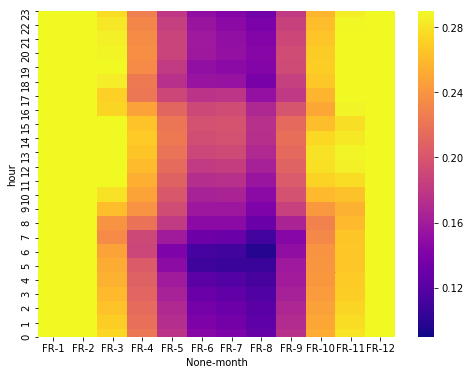

In [49]:
# credits S Godinho @ https://www.kaggle.com/sgodinho/wind-energy-potential-prediction

df_wind_on['year'] = df_wind_on['time'].dt.year
plt.figure(figsize=(8, 6))
temp_df = df_wind_on[['FR', 'month', 'hour']]
temp_df = temp_df.groupby(['hour', 'month']).mean()
temp_df = temp_df.unstack('month').sort_index(ascending=False)
sns.heatmap(temp_df, vmin = 0.09, vmax = 0.29, cmap = 'plasma')